In this notebook we will solve one of the most basic CFD equation: One dimensional linear convection. The equation we aim to solve is the following one:

$$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x}$$

where $u\equiv$ Wave x direction displacement, $t\equiv$ Time and $c\equiv$ Velocity of the wave in x direction.

Our aim is to solve the equation using a finite-difference scheme. To get this we will need to discretize the equation in both time and space. We will use two different but very similar discretization methods: For the space derivative we will use the Backward Euller Method (also known as Implicit Euler Method). In the case of the time derivative, we will use the Forward Euler Method.

|Simbol|Definition|Unit|
|------|----------|----|
|i| Time step|#|
|n| Space step|#|
|$\Delta t$| Time step discretization value| s|
|$\Delta x$| Space step discretization value| m|

#### Backward Euler Method

$$\frac{\partial u}{\partial x}\sim \frac{u^{i}_{n}-u^{i}_{n-1}}{\Delta x}$$


#### Forward Euler Method

$$\frac{\partial u}{\partial t}\sim \frac{u^{i+1}_{n}-u^{i}_{n}}{\Delta t} $$


#### Discretize Equation

$$ \frac{u^{i+1}_{n}-u^{i}_{n}}{\Delta t} + c \frac{u^{i}_{n}-u^{i}_{n-1}}{\Delta x}=0$$

$$u^{i+1}_{n}= u^{i}_{n} + c \frac{\Delta t}{\Delta x}(u^{i}_{n-1}-u^{i}_{n})$$

## Modules for the Code

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

 ## Paremeter Definitions

In [2]:
n_x = 41 # Discretization points of x-space
n_t = 25 # Discretization points of time
Delta_x = 2 / (n_x-1) # Time step discretization value
Delta_t = 0.025 # Space step discretization value
c=1.0 # Wave velocity

## Vectors definition

In [3]:
time_range = np.arange(0, n_t*Delta_t, Delta_t) # Simulation time range
x_space_range= np.arange(0, n_x*Delta_x, Delta_x) # Simulation x-space range
ut=np.ones([n_x]) # This vector will contain u values in one step time over n_x points
ut_last=np.zeros([n_x]) # This vector will contain u values in one step time over n_x points for nt=0

## Initial State

In [4]:
# Create a initial state for all n_x points of ut vector
for i in range(0,n_x):
    if 11<=i<=21:
        ut[i] = 2.0
    else:
        ut[i] = 1.0

## Solver

In [5]:
# We will solve ut for every n_x point in n_t time steps. The objective is to plot the last state of ut.
# If we wanted to plot every step of ut, a matrix it can be used with the form ut[n_t,n_x]

for i in range(0, n_t):
    ut_last = ut.copy() ##copy the existing values of ut into ut_last
    for j in range(1, n_x):
        ut[ j ]= ut_last[ j ] - c * ( Delta_t / Delta_x ) * (-ut_last[j - 1] + ut_last[j])

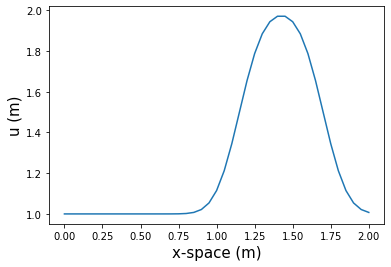

In [15]:
plt.plot(np.linspace(0, 2, n_x), ut);
plt.xlabel("x-space (m)",fontsize=15);
plt.ylabel("u (m)",fontsize=15);

Linear convection can be use for any other parameter like temperatura,... We can also introduce a diffusion term like:

$$\alpha \frac{\partial^{2}u}{\partial x^{2}}$$